Project 1: Titanic Survival Prediction
🎯 Objective:
Predict whether a passenger survived the Titanic disaster using features like age, gender, and class.

🔧 Skills Practiced:
    Data cleaning & missing value handling
    Categorical encoding
    Feature selection/engineering
    Train/test split
    Random Forest / Logistic Regression
    Model evaluation (accuracy, confusion matrix)
🛠 Tools Used:
    Python
    pandas, numpy
    scikit-learn
    Jupyter Notebook
    Dataset from Kaggle/Stanford University 

In [ ]:
#Import necessary libraries (pandas for data manipulation)
import pandas as pd

#Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\festu\ML05102025\myML\Titanic_Analysis\titanic.csv")

   Survived  Pclass                                                Name     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0         0       3                              Mr. Owen Harris Braund    male  22.0                        1                        0   7.2500
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cumings  female  38.0                        1                        0  71.2833
2         1       3                               Miss. Laina Heikkinen  female  26.0                        0                        0   7.9250
3         1       1         Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0                        1                        0  53.1000
4         0       3                             Mr. William Henry Allen    male  35.0                        0                        0   8.0500
     Survived  Pclass                            Name     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard   Fare
882  

**Clean and Preprocessing**

***Understanding what we are dealing with***

In [38]:
#Show the shape of the DataFrame (number of rows and columns)
print("\n===  DataFrame Shape ===")
print(df.shape) #887 rows, 7 columns
print("##" * 25)

#Display the data types of each column in the DataFrame
print("\n===  DataFrame dtypes ===")
print(df.dtypes)
print("**" * 25)

#Display the first 5 rows of the DataFrame in a more readable format
print("\n===  DataFrame head() ===")
print(df.head().to_string())
print("**" * 25)

#Display last 5 rows of the DataFrame in a more readable format
print("\n===  DataFrame tail() ===")
print(df.tail().to_string())
print("**" * 25)




===  DataFrame Shape ===
(887, 7)
##################################################

===  DataFrame dtypes ===
Survived                     int64
Pclass                       int64
Sex                          int32
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object
**************************************************

===  DataFrame head() ===
   Survived  Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0         0       3    1  22.0                        1                        0   7.2500
1         1       1    0  38.0                        1                        0  71.2833
2         1       3    0  26.0                        0                        0   7.9250
3         1       1    0  35.0                        1                        0  53.1000
4         0       3    1  35.0                        0                        0   8.0500
**********

In [39]:
#Display data information about the DataFrame 1\n
print("\n===  DataFrame info() ===")
print(df.info())
print("**" * 25)


===  DataFrame info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    int32  
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.2 KB
None
**************************************************


In [46]:
#Displying the columns
print("\n===  DataFrame columns ===")
print(df.columns)


===  DataFrame columns ===
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [ ]:
#

In [6]:
#Filtering people older than 18 and getting the sum 
print((df["Age"]>= 18).sum())

757


In [7]:
# filtering people under 18 and getting the sum
print((df["Age"] < 18).sum())

130


In [8]:
#Lets proff if that true Sum of above and les than 18 is equal to the total number of records
total = (df["Age"]>= 18).sum() + (df["Age"] < 18).sum()
print(total)

887


In [9]:
#Groupby Sex = female and Pclass = 1
# Note: After encoding, 'Sex' column is 0 for female, 1 for male
firdt_class_female = (df['Sex'] == 0) & (df['Pclass'] == 1)
print(firdt_class_female.tail(10))

877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
dtype: bool


In [10]:
#Lets check how many women were there
women_df = (df["Sex"]==0).sum()

print (women_df)

0


In [11]:
#total population using Pclass
print((df['Pclass']==1) + (df['Pclass']==2) + (df['Pclass']==3))

0      True
1      True
2      True
3      True
4      True
       ... 
882    True
883    True
884    True
885    True
886    True
Name: Pclass, Length: 887, dtype: bool


In [12]:

#Display description of the DataFrame (summary statistics for numerical columns)
print(df.describe().to_string())

         Survived      Pclass         Age  Siblings/Spouses Aboard  Parents/Children Aboard       Fare
count  887.000000  887.000000  887.000000               887.000000               887.000000  887.00000
mean     0.385569    2.305524   29.471443                 0.525366                 0.383315   32.30542
std      0.487004    0.836662   14.121908                 1.104669                 0.807466   49.78204
min      0.000000    1.000000    0.420000                 0.000000                 0.000000    0.00000
25%      0.000000    2.000000   20.250000                 0.000000                 0.000000    7.92500
50%      0.000000    3.000000   28.000000                 0.000000                 0.000000   14.45420
75%      1.000000    3.000000   38.000000                 1.000000                 0.000000   31.13750
max      1.000000    3.000000   80.000000                 8.000000                 6.000000  512.32920


In [13]:
#Plots of data by survival status

#Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Count of Passengers by Survival Status

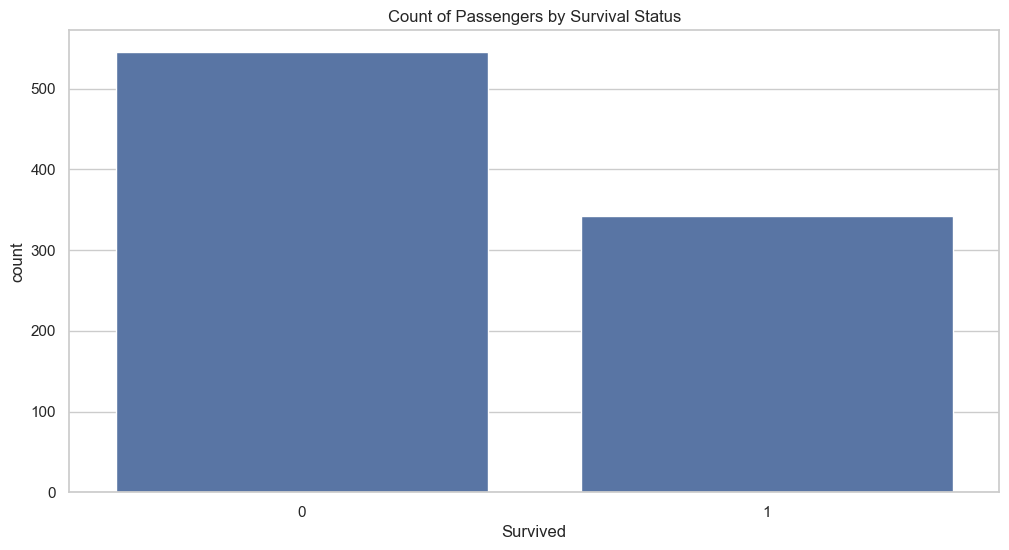

In [28]:


#Set the figure size for the plots
plt.figure(figsize=(12, 6))
#Create a count plot for the 'Survived' column
sns.countplot(x='Survived', data=df)
#Set the title of the plot
plt.title('Count of Passengers by Survival Status')
#Display the plot
plt.show()

Survival by Gender

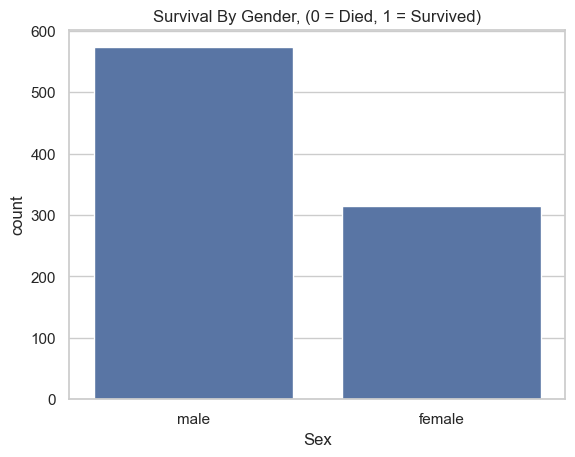

In [15]:
#Create a count plot for the 'Sex' column
sns.countplot(x= 'Sex', data=df)
#Set the title of the plot
plt.title('Survival By Gender, (0 = Died, 1 = Survived)')
#Display the plot
plt.show()


Survival by Pclass

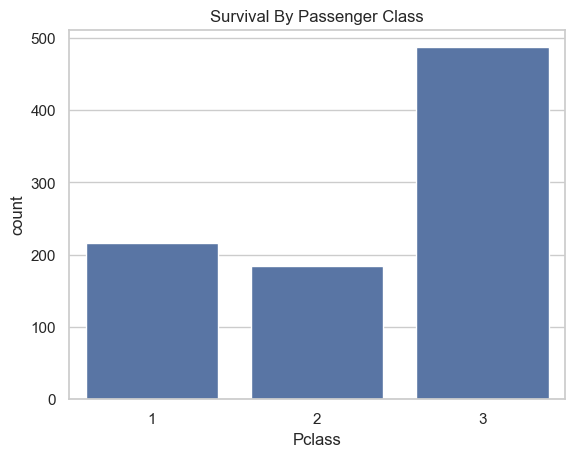

In [16]:
#Create a count plot for the 'Pclass' column
sns.countplot(x='Pclass', data=df)
#Set the title of the plot
plt.title('Survival By Passenger Class')
#Display the plot
plt.show()

Age Distribution of Passengers

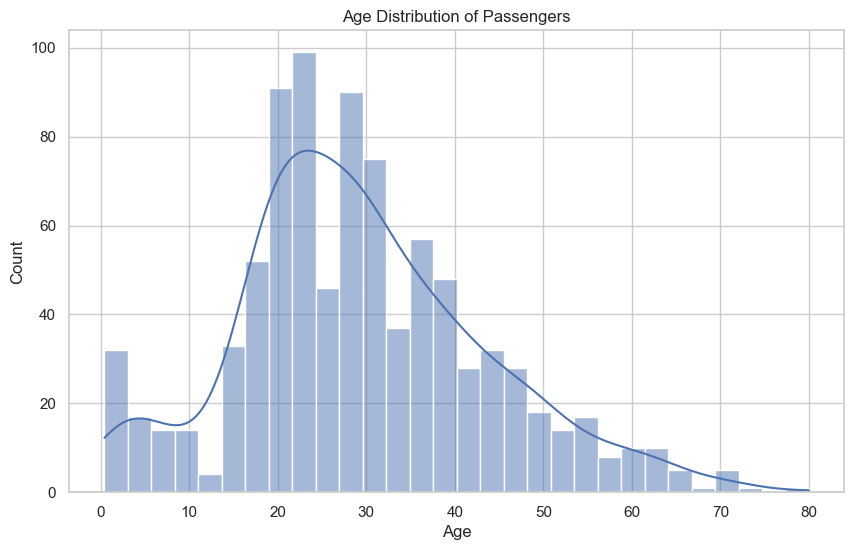

In [17]:
#Create figure for age distribution
plt.figure(figsize=(10,6))
#Create a histogram for the 'Age' column with 30 bins and a kernel density estimate (kde)
sns.histplot(data=df, x='Age', bins=30, kde=True)
#Set the title of the plot
plt.title('Age Distribution of Passengers')
#Display the plot
plt.show()

In [18]:
#We need to drop the attributes that are not useful for our analysis: name
#Drop the 'Name' column from the DataFrame 
df.drop(columns=['Name'], inplace=True) # inplace=True modifies the original DataFrame without creating a copy

#Display the first 5 rows of the modified DataFrame and convert it to a string for better readability
print(df.head().to_string())

   Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0         0       3    male  22.0                        1                        0   7.2500
1         1       1  female  38.0                        1                        0  71.2833
2         1       3  female  26.0                        0                        0   7.9250
3         1       1  female  35.0                        1                        0  53.1000
4         0       3    male  35.0                        0                        0   8.0500


In [19]:
#lets check if thereare any missing values in the dataset
print(df.isnull().sum()) #O missing values in the dataset

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [20]:
#Lets import the libraries for encording data from categorical to numerical (sex)
from sklearn.preprocessing import LabelEncoder #for encoding categorical variables need to install sklearn, pip install -U scikit-learn

le = LabelEncoder() #create an instance of the LabelEncoder class
#Encode the sex column (categorical variable) into numerical values
df["Sex"] = le.fit_transform(df['Sex']) #fit_transform() method fits the encoder and transforms the data in one step

#Display the first 5 rows of the DataFrame after encoding
print(df.head().to_string())

   Survived  Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0         0       3    1  22.0                        1                        0   7.2500
1         1       1    0  38.0                        1                        0  71.2833
2         1       3    0  26.0                        0                        0   7.9250
3         1       1    0  35.0                        1                        0  53.1000
4         0       3    1  35.0                        0                        0   8.0500


In [21]:

print(df.head().to_string()) #Display the first 5 rows of the modified DataFrame

   Survived  Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare
0         0       3    1  22.0                        1                        0   7.2500
1         1       1    0  38.0                        1                        0  71.2833
2         1       3    0  26.0                        0                        0   7.9250
3         1       1    0  35.0                        1                        0  53.1000
4         0       3    1  35.0                        0                        0   8.0500


**Train/Test Split**

In [22]:
#import the libraries for needed for training the model
from sklearn.model_selection import train_test_split #for splitting the dataset into training and testing sets

#Drop the Survived column from the DataFrame to create the feature set (X)
X = df.drop(columns=['Survived']) #X will contain all columns except 'Survived'
#Create the target variable (y) by selecting the Survived column
y = df['Survived'] #y will contain only the 'Survived' column

#Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state ensures reproducibility of the split

**Train Model**

In [23]:
# We will use the Random Forest Classifier for our model
from sklearn.ensemble import RandomForestClassifier #for the Random Forest Classifier

#Create an instance of the RandomForestClassifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators specifies the number of trees in the forest
#Train the model using the training data
model.fit(X_train, y_train) #fit() method trains the model on the training data
#Make predictions on the test data
y_pred = model.predict(X_test) #predict() method generates predictions for the test data


**Printing Predictions vs Actual Values**

In [24]:
# Predict on the test data
y_pred = model.predict(X_test) #predict() method generates predictions for the test data

#comparing the first 10 predictions with the actual values
comp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #create a DataFrame to compare actual and predicted values

#printing the firdt 10 rows of the comparison DataFrame
print(comp_df.head(10).to_string()) #Display the first 10 rows of the comparison DataFrame

     Actual  Predicted
296       1          0
682       0          0
535       0          0
644       1          0
623       0          0
39        1          1
529       0          0
585       0          0
723       1          1
141       1          0


**Evaluating the Modeland checking the Accuracy**

In [25]:
#import the libraries for evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #for generating classification report and confusion matrix

preds = model.predict(X_test) #make predictions on the test data
#Generate the classification report
print(classification_report(y_test, preds)) #classification_report() generates a report showing the main classification metrics

print("Accuracy:", accuracy_score(y_test, preds)) #accuracy_score() calculates the accuracy of the model

print("Confusion Matrix:\n", confusion_matrix(y_test, preds)) #confusion_matrix() generates a confusion matrix to evaluate the performance of the model

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       111
           1       0.69      0.67      0.68        67

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178

Accuracy: 0.7640449438202247
Confusion Matrix:
 [[91 20]
 [22 45]]


In [26]:
#Display the feature importances
importances = model.feature_importances_ #feature_importances_ attribute contains the importance of each feature
print("Feature Importances:\n", importances) #Display the feature importances

Feature Importances:
 [0.09236833 0.28743205 0.25757202 0.05090601 0.03330337 0.27841822]


**From the above, The feature importance can be summarized**
** # Titanic Feature Importance Summary

## Feature Importances
| Feature | Importance | % Contribution |
|---------|------------|----------------|
| Sex     | 0.2874     | 28.74%         |
| Fare    | 0.2784     | 27.84%         |
| Age     | 0.2576     | 25.76%         |
| Pclass  | 0.0924     | 9.24%          |
| Siblings/Spouses Aboard | 0.0509 | 5.09%  |
| Parents/Children Aboard | 0.0333 | 3.33%  |

## Interpretation
- **Sex (28.74%)**: Most critical; women had higher survival rates due to "women and children first."
- **Fare (27.84%)**: High fares linked to first-class, better lifeboat access.
- **Age (25.76%)**: Children prioritized; younger passengers more resilient.
- **Pclass (9.24%)**: Moderate impact; overlaps with `Fare`.
- **Siblings/Spouses (5.09%)** & **Parents/Children (3.33%)**: Minor impact; family size less relevant.

## Takeaways
- `Sex`, `Fare`, `Age` drive ~82% of predictions.
- `Pclass` partially redundant with `Fare`.
- Family features have low influence.